# **Basemap plots - maps and geographic datasets**


© by A.Richter (under construction)

<img src=88x31.png  width="10%" style="float: left;"> 

**Preface:**

This notebook gives an overview of the different options to work with geograpical data. Simple basemap plots will be introduced as well as interactive maps. Geocoding and an extension of coordinate system knowledge will be presented.

## Overview of the notebook:
 
   1. [A simple Basemap plot](#base)
   2. [Plotting points,lines polygones from shapefiles](#point)
   3. [Plotting points at position (lat/lon)](#lat)
   4. [Interactive Maps](#interactive)
   5. [Intro to geopy module ](#geopy)
   6. [Geoplotlib Examples](#geoplotlib)
   7. [Iris Data](#iris)
   8. [Geopandas Examples](#geopandas)
   9. [Excursus on Coordinate Systems](#coords2)
   10. [Different views on data](#dataviews)
   11. [Align Rasterdatasets](#align)
   

https://scitools.org.uk/iris/docs/latest/index.html

conda install -c conda-forge cartopy

pip install geoplotlib

pip install pyglet

pip install geopy

conda install -c conda-forge iris

conda install -c conda-forge iris-sample-data


=======================
for the interactive maps:

pip install ipyleaflet

conda install -c conda-forge nodejs

jupyter nbextension enable --py --sys-prefix ipyleaflet  # can be skipped for notebook 5.3 and above

jupyter labextension install jupyter-leaflet

jupyter labextension install @jupyter-widgets/jupyterlab-manager

=======================

pip install descartes

pip install geopandas  (http://geopandas.org/index.html)



In [1]:
import numpy as np                   # numeric python
import matplotlib.pyplot as plt      # plot library
import matplotlib.mlab as mlab       
 
import scipy as sp                   # scientific python
import scipy.stats as sts
from scipy import stats              # statistical distributions

import pandas as pd                  # dataframes, data containers
import skimage.io as skio            # images
import glob


## A simple Basemap plot <a name="base" ></a>

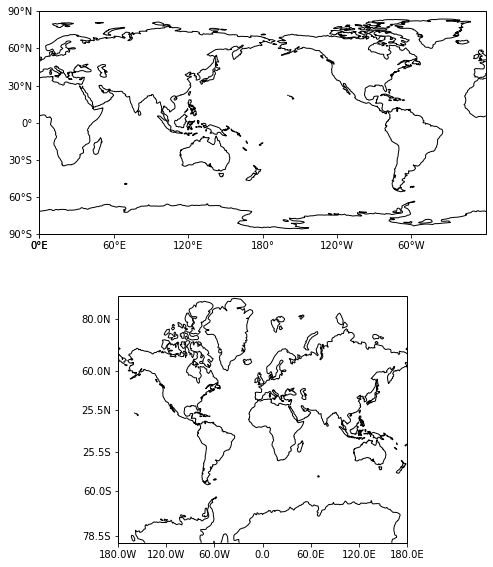

In [8]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 10))

# Label axes of a Plate Carree projection with a central longitude of 180:
ax1 = plt.subplot(211, projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_global()
ax1.coastlines()
ax1.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Label axes of a Mercator projection without degree symbols in the labels
# and formatting labels to include 1 decimal place:
ax2 = plt.subplot(212, projection=ccrs.Mercator())
ax2.set_global()
ax2.coastlines()
ax2.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax2.set_yticks([-78.5, -60, -25.5, 25.5, 60, 80], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.1f',
   degree_symbol='',
   dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f',
  degree_symbol='')
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)

plt.show()


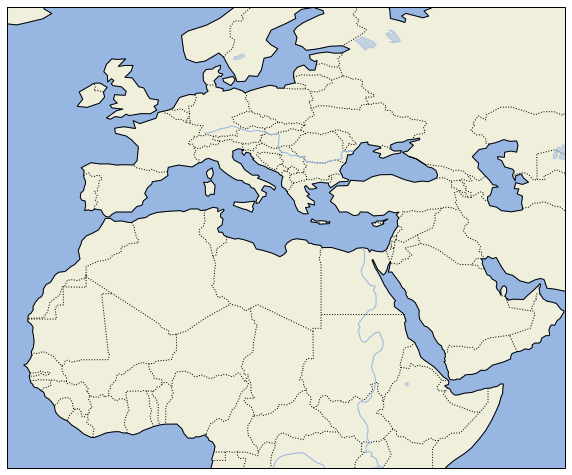

In [22]:
import cartopy
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-20, 60, 0, 60])

plt.show()

## Plotting points,lines polygones from shapefiles <a name="point" ></a>

In [14]:
import cartopy.io.shapereader as shpreader

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

reader = shpreader.Reader(shpfilename)
countries = reader.records()
country = next(countries)
print(sorted(country.attributes.keys()))

population = lambda country: country.attributes['pop_est']

['ABBREV', 'ABBREV_LEN', 'ADM0_A3', 'ADM0_A3_IS', 'ADM0_A3_UN', 'ADM0_A3_US', 'ADM0_A3_WB', 'ADM0_DIF', 'ADMIN', 'BRK_A3', 'BRK_DIFF', 'BRK_GROUP', 'BRK_NAME', 'CONTINENT', 'ECONOMY', 'FIPS_10_', 'FORMAL_EN', 'FORMAL_FR', 'GDP_MD_EST', 'GDP_YEAR', 'GEOUNIT', 'GEOU_DIF', 'GU_A3', 'HOMEPART', 'INCOME_GRP', 'ISO_A2', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'LABELRANK', 'LASTCENSUS', 'LEVEL', 'LONG_LEN', 'MAPCOLOR13', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAX_LABEL', 'MIN_LABEL', 'MIN_ZOOM', 'NAME', 'NAME_ALT', 'NAME_AR', 'NAME_BN', 'NAME_CIAWF', 'NAME_DE', 'NAME_EL', 'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_HI', 'NAME_HU', 'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_LEN', 'NAME_LONG', 'NAME_NL', 'NAME_PL', 'NAME_PT', 'NAME_RU', 'NAME_SORT', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH', 'NE_ID', 'NOTE_ADM0', 'NOTE_BRK', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'POSTAL', 'REGION_UN', 'REGION_WB', 'SOVEREIGNT', 'SOV_A3', 'SUBREGION', 'SUBUNIT', 'SU_A3', 'SU_DIF', 'TINY', 'TYPE', 'UN_A3', 'WB_A2', 'WB

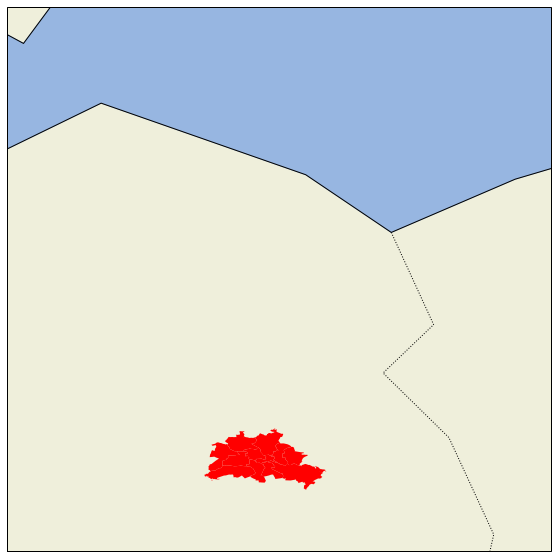

In [14]:

#reader = shpreader.Reader("data/berlin-latest/roads.shp")
#ax = plt.axes(projection=ccrs.Robinson())
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy

fname = 'data/berlin-latest/Bezirke__Berlin.shp'
#fname = 'data/DE/de_1000km.shp'
#fname = 'data/DE/de_10km.shp'
#fname = 'data/DE/de_1km.shp'


shape_feature = ShapelyFeature(Reader(fname).geometries(),ccrs.PlateCarree(), facecolor='red')

plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(shape_feature)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

#ax.set_extent([8, 15, 45, 55])

ax.set_extent([12, 15, 52, 55])

plt.show()

Alternatively shapefiles can be used and handled in pure python


References :

 - https://www.naturalearthdata.com/downloads/
 - http://download.geofabrik.de/europe/germany/berlin.html
 - https://stackoverflow.com/questions/42237802/plotting-projected-data-in-other-projectons-using-cartopy
 - https://opendata-esri-de.opendata.arcgis.com/search?collection=Dataset&q=Deutschland&tags=germany
 - https://github.com/jupyter-widgets/ipyleaflet


https://github.com/GeospatialPython/pyshp

## Plotting points at position (lat/lon) <a name="lat" ></a>

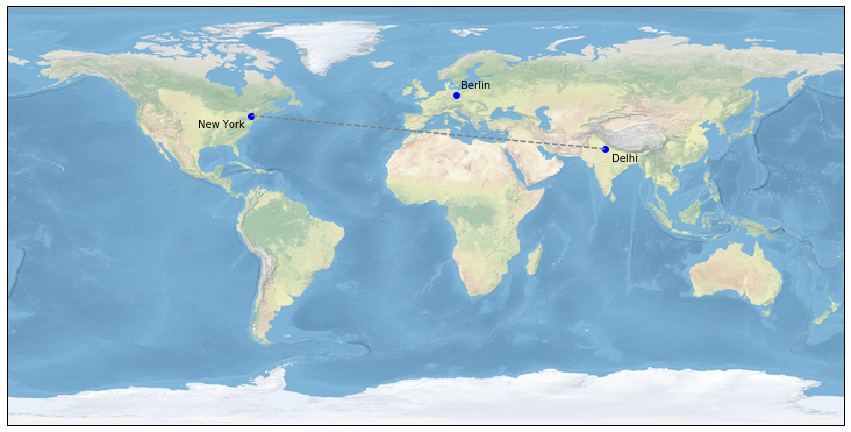

In [63]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61


plt.plot([13],[52],color='blue', linewidth=2, marker='o',transform=ccrs.Geodetic())
plt.text(15, 55, 'Berlin',horizontalalignment='left', transform=ccrs.Geodetic())

plt.plot([-75],[43],color='blue', linewidth=2, marker='o',transform=ccrs.Geodetic())
plt.plot([77.23],[28.61],color='blue', linewidth=2, marker='o',transform=ccrs.Geodetic())
plt.text(ny_lon - 3, ny_lat - 5, 'New York', horizontalalignment='right',  transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 5, 'Delhi',horizontalalignment='left',transform=ccrs.Geodetic())


#plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],color='red', linewidth=2, marker='o',transform=ccrs.Geodetic(), )
plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat], color='gray', linestyle='--', transform=ccrs.PlateCarree(),)


plt.show()

**and label them...**

# Interactive Maps <a name="interactive" ></a>

In [1]:
from ipyleaflet import *

In [2]:
%matplotlib inline

In [3]:
m=Map(center=(52, 13), zoom=8, basemap=basemaps.Esri.DeLorme)
m

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/Specialty/DeLorme_World_Base_Map/MapS…

Add a polygon over Berlin in the Map

In [4]:
#from ipyleaflet import Map, Polygon

polygon = Polygon(locations=[(53, 12.5), (53, 14), (52, 14), (52, 12.5)],
    color="green",
    fill_color="green"
)

m.add_layer(polygon);

#m

Adding data to maps


In [71]:
import pandas as pd

data2=pd.read_csv('data/metro.csv')

data2[['lat','lon']].values.tolist()[1:10]


#https://datatofish.com/convert-pandas-dataframe-to-list/

[[55.685868526571, 12.499526547989198],
 [55.683481834477206, 12.512872782305601],
 [55.6818054503586, 12.522414231317502],
 [55.6812025514164, 12.533993297476401],
 [55.6818207545443, 12.5524304647436],
 [55.6838427596616, 12.571044165432301],
 [55.6791847414513, 12.585228066925799],
 [55.6720538574613, 12.5913850169458],
 [55.66342237336121, 12.585216893379801]]

In [78]:
from ipyleaflet import Map, Marker
marker = Marker(location=data2[['lat','lon']].values.tolist()[1], draggable=False)
m.add_layer(marker);
m

Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/Specialty/DeLorme_World_Base_Map/MapS…

The imported TIF raster files can represent layers in a 3D data structure where each layer 
has another above and below itself. Except for the first and the last layer.

## Intro to geopy module <a name="geopy" ></a>

https://geopy.readthedocs.io/en/latest/


 - https://en.wikipedia.org/wiki/Great-circle_distance
    
 - https://en.wikipedia.org/wiki/Geodesics_on_an_ellipsoid

In [1]:
from geopy import distance

In [2]:
for ell in distance.ELLIPSOIDS: print(ell)

WGS-84
GRS-80
Airy (1830)
Intl 1924
Clarke (1880)
GRS-67


Rasterdata in Form of Digital Elevation models

https://github.com/GeospatialPython/srtm.py

## Geoplotlib examples <a name="geoplotlib" ></a>


pip install geoplotlib

pip install pyglet

In [ ]:
import geoplotlib
thedata = geoplotlib.utils.read_csv('data/bus.csv')
geoplotlib.dot(thedata)
geoplotlib.show()

In [3]:
import geoplotlib
data = geoplotlib.utils.read_csv('data/metro.csv')
geoplotlib.dot(data)
geoplotlib.show()

## Intro to IRIS datasets <a name="iris" ></a>

In [79]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import iris
import iris.plot as iplt
import iris.quickplot as qplt

AttributeError: 'AxesSubplot' object has no attribute 'coastlines'

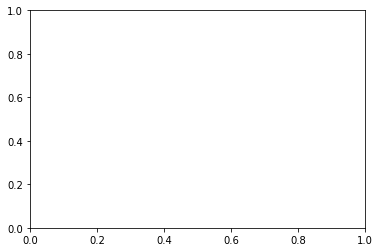

In [82]:
file_path = iris.sample_data_path('air_temp.pp')
cube = iris.load_cube(file_path)
#qplt.contourf(cube)
ax = plt.gca()
ax.coastlines()
ax.gridlines()
iplt.show()

## Geopandas examples <a name="geopandas" ></a>

In [1]:
# https://nbviewer.jupyter.org/gist/perrygeo/c426355e40037c452434

importing a shape file with Point features

In [3]:
%matplotlib inline
import geopandas as gpd

In [4]:
pts = gpd.GeoDataFrame.from_file('data/berlin-latest/places.shp')

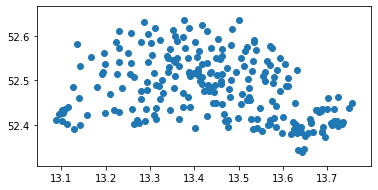

In [5]:
pts.plot()

importing a shape file with Polygon features

In [6]:
BerlinBez = gpd.GeoDataFrame.from_file('data/berlin-latest/Bezirke__Berlin.shp')

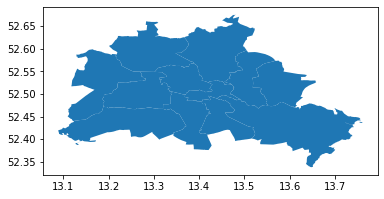

In [7]:
BerlinBez.plot()

In [8]:
BerlinBez

,OBJECTID,gml_id,Gemeinde_n,Gemeinde_s,Land_name,Land_schlu,Schluessel,Shape__Are,Shape__Len,geometry
0,1,s_wfs_alkis_bezirk.F176__1,Reinickendorf,012,Berlin,11,11000012,2.416586e+08,85589.289316,"POLYGON ((13.3207443281765 52.6265990635925, 1..."
1,2,s_wfs_alkis_bezirk.F176__2,Charlottenburg-Wilmersdorf,004,Berlin,11,11000004,1.742738e+08,71785.131858,"POLYGON ((13.3211096415616 52.5244629906886, 1..."
2,3,s_wfs_alkis_bezirk.F176__3,Treptow-Köpenick,009,Berlin,11,11000009,4.503972e+08,149810.619914,"POLYGON ((13.5792539458089 52.3908302513483, 1..."
3,4,s_wfs_alkis_bezirk.F176__4,Pankow,003,Berlin,11,11000003,2.792661e+08,109210.896203,"(POLYGON ((13.5048079665743 52.6195982101068, ..."
4,5,s_wfs_alkis_bezirk.F176__5,Neukölln,008,Berlin,11,11000008,1.207122e+08,66590.293473,"POLYGON ((13.4583203518438 52.4856882506131, 1..."
5,6,s_wfs_alkis_bezirk.F176__6,Lichtenberg,011,Berlin,11,11000011,1.406199e+08,75961.265817,"POLYGON ((13.5231622474414 52.4742418993467, 1..."
6,7,s_wfs_alkis_bezirk.F176__7,Marzahn-Hellersdorf,010,Berlin,11,11000010,1.666802e+08,67457.607608,"POLYGON ((13.6131722225913 52.4721329895958, 1..."
7,8,s_wfs_alkis_bezirk.F176__8,Spandau,005,Berlin,11,11000005,2.477770e+08,100052.537728,"POLYGON ((13.231191375419 52.5612351042813, 13..."
8,9,s_wfs_alkis_bezirk.F176__9,Steglitz-Zehlendorf,006,Berlin,11,11000006,2.754574e+08,103050.006867,"POLYGON ((13.3195245310051 52.4669887925436, 1..."
9,10,s_wfs_alkis_bezirk.F176__10,Mitte,001,Berlin,11,11000001,1.062882e+08,58707.772351,"POLYGON ((13.3772116516902 52.5609060360395, 1..."


In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
world.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819135928291 41.30864166926936,..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,(POLYGON ((141.0002104025918 -2.60015105551566...
8,260580739,Asia,Indonesia,IDN,3028000.0,(POLYGON ((141.0002104025918 -2.60015105551566...
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...


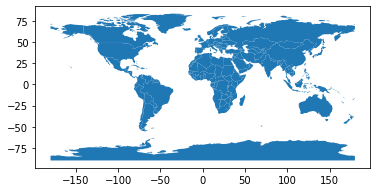

In [11]:
world.plot()

## Excursus on Coordinate Systems <a name="coords2"></a>

Georeference is the most important property of GIS Data. But even if standardized software packadges like **QGIS** or **ESRI ArcGIS** is are used the human beeing has to check whether all given information especially the georeference of the used datasets is correct or not. Most people trust to much in the ancestry and the correctness of the priorly applied processing steps and end up with a failed analysis even if their processing steps were totally correct.   

Spatial data is always a complex matter and has to be handled very carefully.

Before you start working with spatial data ask yourself the follwoing quetions:

 - Where does the dataset come from? 
 - Does the dataset have descriptive information? (metadata)
 - Do the people who provided the data to you know what they are doing? (Are they a reliable source?)
 - Wich Backgroud information on the history of the dataset can they also provied? (Can you ask somebody about it?)
 - Which location is refered to in geographical coordinates (lat/lon) ?
 - Is a reference coordinate system given in form of an EPSG Code? (www.epsg.org)
 - Which projected coordinates systems are valid for this area? (Refer to www.epsg-registry.org)
 - Does the dataset fit to other reference data? (data that you are sure about the correct georeference or location)

We will have a little review on the theory and than do some examples. 

<img src="figures/coord.png" width="50%">  

The very basic coordinate grid on the earth is the latitude-longitude grid and well known to most people from school. 
This coordinate referece is good for global observations and small scale phenomena that can be used to gain overview of a certain area.


For larger scales the so called geographic coordinates are awkward.


References :

   - http://epsg.io/map#srs=32619&x=4816821.216771&y=8787497.280941&z=3&layer=streets
   


**The Lat/Lon conversion between Degree Minutes and Seconds and back**

In [8]:
class ConversionOfGeoCoords:


    def D2DMS(degree):
        import math 
        Deg=math.floor(degree)
        Min=math.floor((degree-Deg)*60)
        Sec=((degree-Deg)*60 - Min)*60
    
        return Deg,Min,Sec

    def DMS2D(degree,minute,second):
        degree=degree+minute/60+second/3600
        return degree

In [12]:
#52.5097612943 13.3732985068
#52°30'35.14" N 13°22'23.87" E

print(ConversionOfGeoCoords.D2DMS(52.5097612943))

print(ConversionOfGeoCoords.DMS2D(13,22,23.87))

print(ConversionOfGeoCoords.D2DMS(13.3732985068))

print(ConversionOfGeoCoords.DMS2D(13,22,23.874624479997948))


(52, 30, 35.140659479995406)
13.373297222222222
(13, 22, 23.874624479997948)
13.3732985068


**Use Map coordinates like UTM** 

https://latitude.to/articles-by-country/fr/france/6/eiffel-tower

check for places to get the coordinates

In [9]:
#import the pyproj library
import pyproj

# set point P coordinates: 
# P = (-70.93931369842528, 43.13567095719326)

#Point location (Lon | Lat)
P_EifelTower   =        [2.2945, 48.8583]

#for example the Eifel Tower in Paris has the coordinates: 48°51'29.88" N | 2°17'40.20" E
#31U 448251.89829058 5411943.7941772
#EPSG: 25831

#GPS coordinates of Brandenburg Gate, Germany
P_BrandenbugerGate =        [13.3732985068, 52.5097612943]
#52.5097612943 13.3732985068
#52°30'35.14" N 13°22'23.87" E
#33U 389602.79943668 5818981.3992737


# define projection UTM 31 N: 
#    UTM zone 31, ETRS89 ellipsoide, ETRS89 datum, defined by epsg code 25831
p25831 = pyproj.Proj(init='epsg:25831')
p25833 = pyproj.Proj(init='epsg:25833')

#Find UTM coordinates for the point P(-70.93931369842528,43.13567095719326)
x1, y1 = p25831(P_EifelTower[0],P_EifelTower[1])
x2, y2 = p25833(P_BrandenbugerGate[0],P_BrandenbugerGate[1])
print("x1, y1:",x1,"|",y1)
print("x2, y2:",x2,"|",y2)

x1, y1: 448251.8982900976 | 5411943.793685854
x2, y2: 389602.79943572666 | 5818981.398655621


https://fiona.readthedocs.io/en/latest/README.html
    

brew install gdal

pip install fiona

test this before fiona is used.

### Coordinate Reference Systems and Earth Ellipsoids

### Coordinate System Conversion with Ellipsoid Change

References:
  - https://github.com/epifanio/OSGeospatial-Notebooks

## Different views on data <a name="dataviews"></a>

There are different view on data between GeoScience (GIS) and Machine Learning that can be easily mixed up and cause confusion. Using a clear wording is essential for working in both areas.

### GIS VIEW


In case of GIS-Data the geometric objects like points (lines or polygons) are organized in tabular datastructures (shapefiles or geodatabases) where a **row** in so called **attributes table** represents an object or lets say is connected to an object in the map. Such an object in the map is called a **feature** and the whole dataset (consiting of many geometric objects) is called a **featureclass**.

For further information see: 
http://desktop.arcgis.com/en/arcmap/10.3/manage-data/tables/what-are-tables-and-attribute-information.htm

https://gisgeography.com/geodatabase-personal-file/

<img src=http://desktop.arcgis.com/de/arcmap/10.3/manage-data/tables/GUID-E9C5D05E-5D42-4078-8E86-57BAD0FD5FC8-web.png  width="40%" style="left;">


The columns of the attributes tables represent the properties of the geometric objects and are simply called **attributes** which is where the attributes table of a feature class got its name from.

### MachineLearning VIEW

On the other hand the machine learning commuity has accustomed over the years to work with data representations in form of Design Matrixes. As we have seen before 2D-matrixes are directly comparable with tables as they also consist
of rows and columns.

In machine learning a **datapoint** is considered to be a **sample and represented by a row** in the design matrix. 

The **columns** of the design matrix are called the **features** of the datapoint which uses the same word as in GIS  but refers to the differnt meaning.

<img src="figures/data_representation.svg" width="50%">  

Raster to Design-Matrix
===
- Reshape RasterMatrix to Vector and normalize it [0,1]
- make Design Matrix from column-Vectors




In [12]:
#reshape Matrix in Vektor umwandeln
from scripts.BasisFunctions import Mat2NormVec,Mat2Vec
import scipy.io as sio

ncols=len(LayerTrain)+1 
print( ncols)
A=np.zeros((np.ravel(LayerTrain.get('TIF_TrueLabels')).shape[0],ncols))  #Design Matrix Speicher initialisieren

A[:,0] = 1.0
i=1

for layer in sorted(LayerTrain):
    if 'TIF_r' in layer :
        A[:,i]=Mat2NormVec( LayerTrain.get(layer))
        print (i, layer, np.ravel(LayerTrain.get(layer)).shape)
    elif 'TIF_n' in layer :
        A[:,i]=Mat2Vec( LayerTrain.get(layer))
        print( i, layer, np.ravel(LayerTrain.get(layer)).shape)
    
    else: 
        i-=1
        print(i, layer, np.ravel(LayerTrain.get(layer)).shape)
    i+=1
A[:,ncols-1]=Mat2Vec(LayerTrain.get('TIF_TrueLabels'))


print( A)

# Check stats of disign matrix
print('Maximum Value in DesignMatrix: {}'.format(np.max(A)))
print( '    Anzahl TrueLabels A == 0 : {}'.format( np.sum(A[:,31] ==0)))
print( '    Anzahl TrueLabels A >  0 : {}'.format( np.sum(A[:,31] > 0)))
print( '                        Summe: {}'.format(np.sum(A[:,31] > 0)+np.sum(A[:,31] ==0)))

print( '  Anz. d. Pixel in ori Image : {}'.format(np.ravel(LayerTrain.get('TIF_TrueLabels')).shape[0]))


# Activate the following lines to write the prcessed data from RAM memory to disk 
# use it only locally and do not upload the git archive with the written files as they exite the max file size of a git repository

#sio.savemat('data/LayersTrain.mat', LayerTrain)
#sio.savemat('data/Matrix_A_Train.mat',{'A_Train': A})



32
0 TIF_TrueLabels (508048,)
1 TIF_n_ASPE (508048,)
2 TIF_n_ASPN (508048,)
3 TIF_n_ASPS (508048,)
4 TIF_n_ASPW (508048,)
5 TIF_n_LanduseIRA (508048,)
6 TIF_n_LanduseRAL (508048,)
7 TIF_n_LanduseRL (508048,)
8 TIF_n_PLUT (508048,)
9 TIF_n_SEDI (508048,)
10 TIF_n_VOLC (508048,)
11 TIF_r_AFG_GDEM_V21 (508048,)
12 TIF_r_B1 (508048,)
13 TIF_r_B10 (508048,)
14 TIF_r_B11 (508048,)
15 TIF_r_B2 (508048,)
16 TIF_r_B3 (508048,)
17 TIF_r_B4 (508048,)
18 TIF_r_B5 (508048,)
19 TIF_r_B6 (508048,)
20 TIF_r_B7 (508048,)
21 TIF_r_B8 (508048,)
22 TIF_r_B9 (508048,)
23 TIF_r_Curvature (508048,)
24 TIF_r_DistStreams (508048,)
25 TIF_r_EucDist_badakhshan (508048,)
26 TIF_r_EucDist_faults (508048,)
27 TIF_r_EucDist_roads (508048,)
28 TIF_r_NDVI (508048,)
29 TIF_r_Slope (508048,)
30 TIF_r_precip (508048,)
[[ 1.          0.          1.         ...,  0.          0.          0.        ]
 [ 1.          0.          1.         ...,  0.          0.          0.        ]
 [ 1.          0.          1.         ...,  0.

The prepared data structure (design matrix: A) has 31 features (cols) representing the chracteristics of a classification problem based on geographic data with 508048 datapoints (rows) or pixels from rasterdatasets. The last column (no. 32) is assigned to the decision result [0,1] (true labels) representing the absence or presence of an event.  

## Align rasterdatasets <a name="align" ></a>

for further calculations based on these raster datasets each layer has to have 
the same size and each pixel has to be aligned to the ones above or below them.

In [9]:
# Ausschneiden und auf die gleiche Größe bringen
a,b =LayerTrain['TIF_TrueLabels'].shape 
print( a,b)

for layer in sorted(LayerTrain.keys()  ) :
    if  'TIF_r' in layer or 'TIF_n' in layer:
        print( layer)
        LayerTrain[layer]=LayerTrain.get(layer)[0:a,1:b]
        print( LayerTrain.get(layer).shape)
    #else :
    #    print '---'
    #    print layer    
    #    LayerTrain[layer]=LayerTrain.get(layer)[:,1:]
    #    print LayerTrain.get(layer).shape


#print sorted(LayerTrain.keys()  )
print( 'TIF_TrueLabels shape'  ,LayerTrain['TIF_TrueLabels'].shape   )
print( 'beheben')
LayerTrain['TIF_TrueLabels']=LayerTrain.get('TIF_TrueLabels')[:,1:]
print('TIF_TrueLabels shape' , LayerTrain.get('TIF_TrueLabels').shape)

562 905
TIF_n_ASPE
(562, 904)
TIF_n_ASPN
(562, 904)
TIF_n_ASPS
(562, 904)
TIF_n_ASPW
(562, 904)
TIF_n_LanduseIRA
(562, 904)
TIF_n_LanduseRAL
(562, 904)
TIF_n_LanduseRL
(562, 904)
TIF_n_PLUT
(562, 904)
TIF_n_SEDI
(562, 904)
TIF_n_VOLC
(562, 904)
TIF_r_AFG_GDEM_V21
(562, 904)
TIF_r_B1
(562, 904)
TIF_r_B10
(562, 904)
TIF_r_B11
(562, 904)
TIF_r_B2
(562, 904)
TIF_r_B3
(562, 904)
TIF_r_B4
(562, 904)
TIF_r_B5
(562, 904)
TIF_r_B6
(562, 904)
TIF_r_B7
(562, 904)
TIF_r_B8
(562, 904)
TIF_r_B9
(562, 904)
TIF_r_Curvature
(562, 904)
TIF_r_DistStreams
(562, 904)
TIF_r_EucDist_badakhshan
(562, 904)
TIF_r_EucDist_faults
(562, 904)
TIF_r_EucDist_roads
(562, 904)
TIF_r_NDVI
(562, 904)
TIF_r_Slope
(562, 904)
TIF_r_precip
(562, 904)
TIF_TrueLabels shape (562, 905)
beheben
TIF_TrueLabels shape (562, 904)
